<a href="https://colab.research.google.com/github/casbjr/data_science/blob/master/QuarentenaDados_aula01_%2B_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 01

## Introdução

Olá seja bem-vinda ou bem-vindo ao **notebook da aula01**, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina. Então que tal começar testando algumas linhas de código.

Nesta primeira célula estamos realizando um ```print()```, lembre-se que esta função python imprime a string que estamos passando como parâmetro, então  o retorno é exibido logo abaixo da célula com código.

In [0]:
print("Guilherme Silveira")
print("Paulo Silveira")

Guilherme Silveira
Paulo Silveira


Agora vamos analisar a proxima célula de código. 

Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um *output* logo abaixo do código.

In [0]:
nome_do_filme = "Totoro, o filme"

Agora que criamos a variável ```nome_do_filme```, podemos reutilizá-la, por exemplo na função ```print```, para assim imprimir a *string* "Totoro, o filme".

In [0]:
print(nome_do_filme)

Totoro, o filme


In [0]:
nome_do_filme

'Totoro, o filme'

## Lendo os dados do MovieLens

Nosso primeiro passo foi conhecer e realizar um "hello-world" no colab, agora chegou a hora de importar os dados para o notebook e começar as análises.

Vamos importar a biblioteca [pandas](https://pandas.pydata.org/), um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo **CSV** (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos **xlsx** entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ```filmes.head()``` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ```filmes.sample()```, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (```filmes.sample(5)```). 

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples? 

Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um **?** na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos.

In [0]:
# lendo a documentação de um método/atributo

?filmes.head

In [0]:
# lendo a documentação do tipo (docstring)

?filmes

A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações. 

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. Para descobrir a "forma" dos nossos dados podemos utilizar o ```avaliacoes.shape```, retornando uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [0]:
avaliacoes.shape

(100836, 4)

In [0]:
len(avaliacoes)

100836

Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas. 

usarioId => ID para para usuário que votou em determinado filme.

filmeId => ID para identificar um filme votado.

nota => A nota dada para pelo usuário para o respectivo filme.

momento => A data da votação que não está formatada como data

Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras linhas temos o filme **1, 3, 6, 47, 50**. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?



In [0]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do **filmeId 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [0]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [0]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do **filmeId 1**.

In [0]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o **filmeId 1**, mas também podemos chamar o método ```.describe()``` para a base completa (avaliacões).

In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ok, nós calculamos um tanto de coisa usando `.describe()` e `.mean()`, mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de [chave-valor dos dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python). 

Com o comando ```avaliacoes["nota"]```, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos ```avaliacoes["notas"].means()```


In [0]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes["nota"].mean()

3.501556983616962

Podemos calcular também na nota média do **filmeId 1**, repare que o resultado é um pouco maior que a geral. Apenas com essa análise não da para bater o martelo que o filme 1 é acima da média, mas apenas com essa análise conseguimos formular uma primeira hipótese!

In [0]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Nós calculamos uma média geral, uma média para o filmeId 1. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ```.groupby(filmeId)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.



In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [0]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [0]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

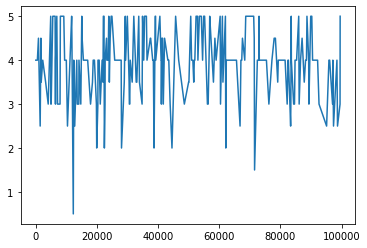

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

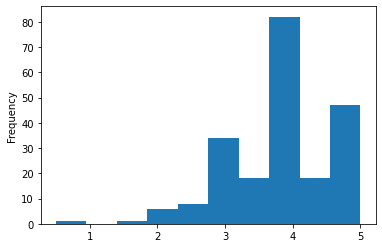

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise? 

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um *line plot*, agora pense em uma [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal). **Você acha que o gráfico de linhas ainda seria uma má ideia?**

Antes de analisar o histograms de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!


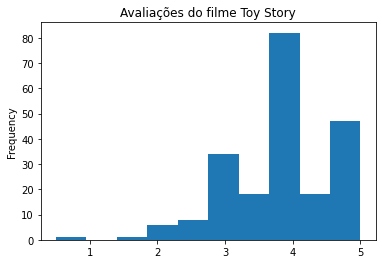

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o [matplotlib](https://matplotlib.org/).

Que tal experimentar um pouquinho esta poderosa ferramenta? 

Vamos importar a lib e adicionar título no gráfico usando o matplotlib, veja como fica na célula a seguir.

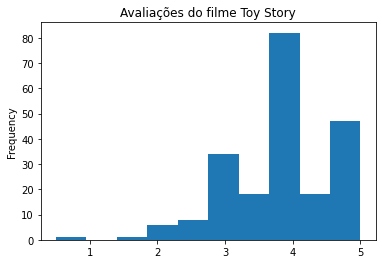

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?

Vamos plotar o histograma do filme Jumanji e da animação Liga da justiça: Doom.

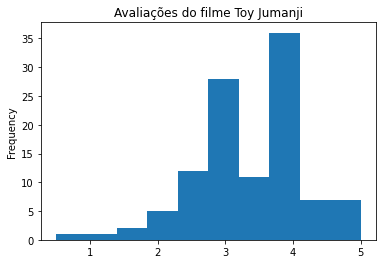

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

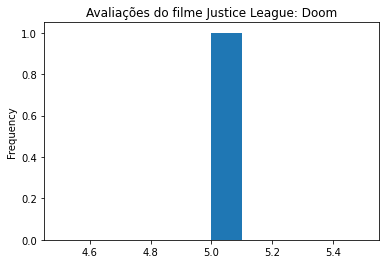

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada). 

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

 - Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. **Será que a animação é um filme tão bom assim?**


Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula) 


Com isso nós fechamos a nossa primeira aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!








# **Desafios**

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [0]:
# Quantos filmes não tem avaliações 
filmes_com_media["nota"].isnull().sum()

18

In [0]:
# Quais são esses filmes
filmes_com_media.query("nota == 'NaN'")['titulo']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
filmes_com_media.rename(columns={"nota":"nota_média"}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
# votos por ID do filme
votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [0]:
# Incluindo o nome do filme
filmes_com_qtd_votos = filmes_com_media.join(votos_por_filme, on="filmeId")
filmes_com_qtd_votos.rename(columns={"nota":"votos"}, inplace=True)
filmes_com_qtd_votos.head()

,filmeId,titulo,generos,nota_média,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_com_qtd_votos.head().round(2)

,filmeId,titulo,generos,nota_média,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos_filmes = filmes['generos'].str.split('|',expand=True).stack().unique()
generos_filmes

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
contagem_generos = filmes_com_qtd_votos['generos'].str.split('|',expand=True).stack().value_counts()
contagem_generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

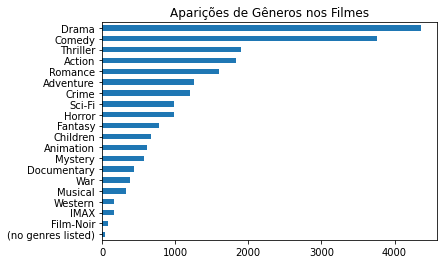

In [0]:
contagem_generos.sort_values(ascending=True).plot(kind='barh',
                      title="Aparições de Gêneros nos Filmes")

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!